<a href="https://colab.research.google.com/github/mvmorr/CE888_Assignment2/blob/master/Pokemon_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load, prepare and inspect the datasets

Pokémon datasets with 91% imbalanced

In [0]:
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, permutation_test_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from google.colab import drive

In [0]:
#Load dataset
data = pd.read_csv("pokemon.csv")
data.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [0]:
#Drop unnecessary features
data.drop(['abilities', 'japanese_name', 'name', 'classfication', 'type1', 'type2'],axis=1, inplace=True)
data.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,49,1059860,0.7,45,88.1,1,65,65,45,6.9,1,0
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,63,1059860,1.0,60,88.1,2,80,80,60,13.0,1,0
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,123,1059860,2.0,80,88.1,3,122,120,80,100.0,1,0
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,43,1059860,0.6,39,88.1,4,60,50,65,8.5,1,0
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,58,1059860,1.1,58,88.1,5,80,65,80,19.0,1,0


In [0]:
#fill missing values
data = data.fillna(0)

In [0]:
X = data.drop(['is_legendary'], axis=1)
y = data.is_legendary

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        801 non-null    float64
 1   against_dark       801 non-null    float64
 2   against_dragon     801 non-null    float64
 3   against_electric   801 non-null    float64
 4   against_fairy      801 non-null    float64
 5   against_fight      801 non-null    float64
 6   against_fire       801 non-null    float64
 7   against_flying     801 non-null    float64
 8   against_ghost      801 non-null    float64
 9   against_grass      801 non-null    float64
 10  against_ground     801 non-null    float64
 11  against_ice        801 non-null    float64
 12  against_normal     801 non-null    float64
 13  against_poison     801 non-null    float64
 14  against_psychic    801 non-null    float64
 15  against_rock       801 non-null    float64
 16  against_steel      801 non

In [0]:
X.shape, y.shape

((801, 34), (801,))

In [0]:
#baseline
clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, X, y)
scores.mean()

0.8324999999999999

In [0]:
#baseline
clf = RandomForestRegressor()
scores = cross_val_score(clf, X, y)
scores.mean()

0.8944507623219344

Stratified Cross Validation, Elbow and Silhouette method


In [0]:
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)

5

In [0]:
print(skf)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


In [0]:
def silhouette(X_train, n_clusters):
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)
  ax1.set_xlim([-0.1, 1])
  ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
  # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(X_train)
  print(cluster_labels)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
  silhouette_avg = silhouette_score(X_train, cluster_labels)
  print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(X_train, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
      ith_cluster_silhouette_values = \
          sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
  colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
  centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
              c="white", alpha=1, s=200, edgecolor='k')

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                  s=50, edgecolor='k')

  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")

  plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % n_clusters),
                fontsize=14, fontweight='bold')

  plt.show()


In [0]:

X_train = []
X_test = []
y_train = []
y_test = []
k_centers = []
# train_index, test_index = next(iter(skf.split(X,y)))
for train_index, test_index in skf.split(X, y):
  print("Train:", train_index, "Test:", test_index)
  X_train.append(X.iloc[train_index])
  X_test.append(X.iloc[test_index])
  y_train.append(y.iloc[train_index])
  y_test.append(y.iloc[test_index])

Train: [152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187
 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205
 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241
 245 246 247 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265
 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283
 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301
 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319
 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337
 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355
 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373
 374 375 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394
 395 396 397 398 399 400 401 402 403 404 405

In [0]:
def elbow_method(train, i):
  means = KMeans(n_clusters=i)
  means.fit(train)
  return means.inertia_

In [0]:
def measure_minority_class(labels, true_labels):
  count = 0
  total = 0
  for i in range(len(labels)):
    if true_labels[i] == 1: 
      total += 1
      if true_labels[i] == labels[i]:
        count+=1
  print("Complete Minority:",count/total)
  if count/total != 1:
    return True
  return False

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0
 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 

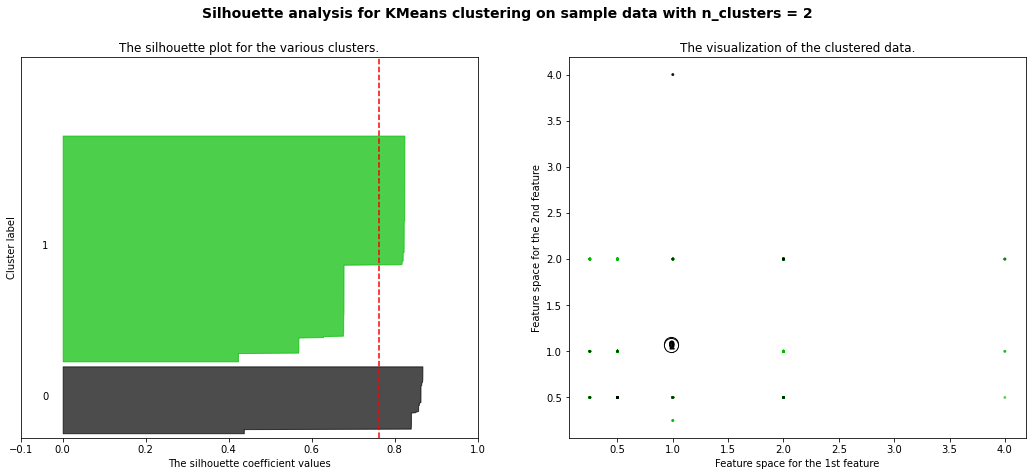

Complete Minority: 0.9464285714285714
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0
 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1
 1 2 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 1 1 0 2 2 2 2 0 0 0 0 0 0 2 2 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 0 0 0 1 0 0 0 0 0 1 1 2
 0 0 2 1 1 1 1 0 0 0 0 1 2 0 0 0 0 0 1 2 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 2 2 2 0 0 0 1
 1 2 0 2 2 0 2 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 2 0 0 0 0 1 0 1 0 2 0 0
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1

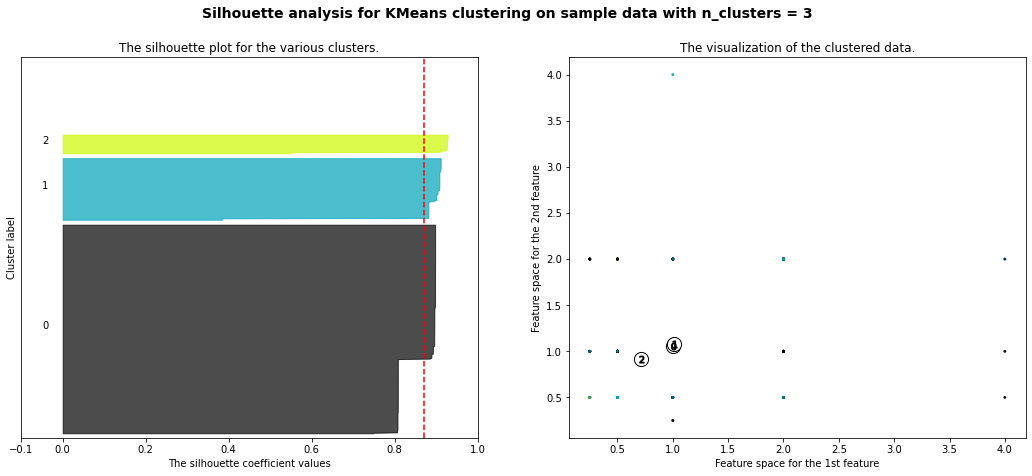

Complete Minority: 0.03571428571428571
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0
 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1
 1 2 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 1 1 0 2 2 2 2 0 0 0 0 0 0 2 2 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 0 0 0 1 0 0 0 0 0 1 1 2
 0 0 2 1 1 1 1 0 0 0 0 1 2 0 0 0 0 0 1 2 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 3 3 1 1 1 2 2 2 0 0 0 3
 3 2 0 2 2 0 2 1 1 1 0 0 1 1 0 0 2 3 0 3 3 1 1 3 3 0 0 0 2 2 2 0 0 0 0 0 2
 2 2 3 2 2 0 0 3 3 0 0 2 2 2 2 2 2 0 0 2 2 2 2 1 2 0 0 0 0 0 0 0 2 2 2 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2 3 3 0 0 2 0 2 2 2 0 0 0 0 0 0 2 0 0 1 1
 1 1 0 0 1 1 1 1 0 0 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 

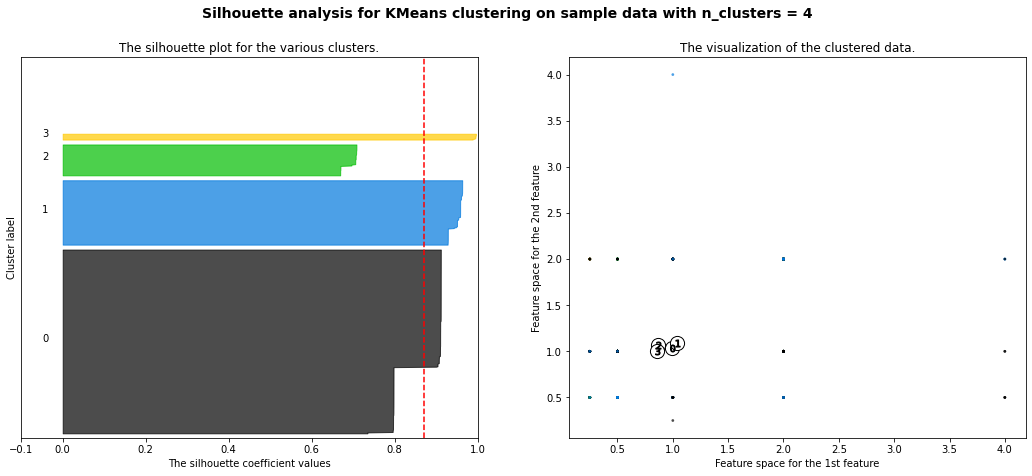

Complete Minority: 0.9464285714285714
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 0
 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1
 1 3 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 0 1 1 0 3 3 3 3 0 0 0 0 0 0 3 3 0
 0 0 0 0 3 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 3 3 0 0 0 1 0 0 0 0 0 1 1 3
 0 0 3 1 1 1 1 0 0 0 0 1 3 0 0 0 0 0 1 3 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 2 2 1 1 1 4 4 4 0 0 0 2
 2 3 0 3 3 0 3 1 1 1 0 0 1 1 0 0 4 2 0 2 2 1 1 2 2 0 0 0 3 3 3 0 0 0 0 0 4
 4 4 2 3 3 0 0 2 2 0 0 4 4 4 4 4 4 0 0 3 3 3 3 1 3 0 0 0 0 0 0 0 4 4 4 1 3
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 3 2 2 0 0 3 0 3 3 3 0 0 0 0 0 0 3 0 0 1 1
 1 1 0 0 1 1 1 1 0 0 1 4 4 1 1 1 0 0 0 1 0 0 0 3 0 0 0 0 1 0 1

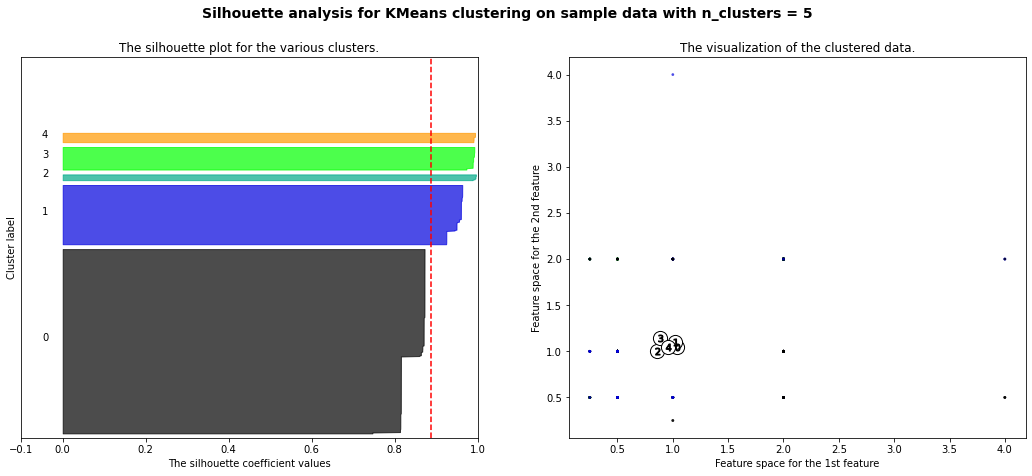

Complete Minority: 0.9464285714285714


In [0]:
rm = RandomForestRegressor()
count = 1
Sum_of_squared_distances = []
final_clustering = []
for i in range(len(X_train)):
  if count > 1:
    silhouette(X_train[i], count)
    km = KMeans(n_clusters=2)
    km.fit(X_train[i])
    final_clustering.append(km.labels_)
    if measure_minority_class(km.labels_, y_train[i].values):
      rm.fit(X_train[i], y_train[i])
    Sum_of_squared_distances.append(elbow_method(X_train[i], count))
  count+=1

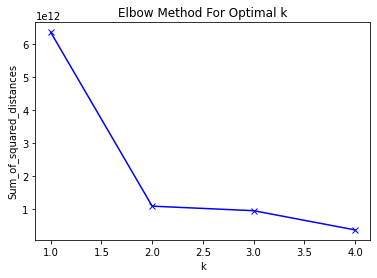

In [0]:
K = range(1,5)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [0]:
score_average = []
for j in range(len(X_test)):
  score, perm, pvalue = permutation_test_score(rm, X_test[j], y_test[j], cv=10, n_permutations=10)
  print(score)
  print(perm)
  print(pvalue)
  score_average.append(score)

0.9529052380952381
[-0.31808252 -0.32652776 -0.58812292 -0.20900005 -0.03578003 -0.16597284
 -0.18586395 -0.31212468 -0.67110381 -0.02661116]
0.09090909090909091
0.2
[-0.153776   -0.16214813 -0.25120305 -0.40077146 -0.18423263 -0.18487027
 -0.1480727  -0.22953201 -0.00611848 -0.1608706 ]
0.09090909090909091
0.1
[-0.34791238 -0.12736557 -0.26568876 -0.236761   -0.12250845 -0.21177415
 -0.43973196 -0.32474453 -0.1569981  -0.12342928]
0.09090909090909091
0.0
[-0.33936305 -0.08590846 -0.49756779 -0.44688774 -0.25587616 -0.22676396
 -0.11655982 -0.20050204 -0.10216305 -0.10413566]
0.09090909090909091
0.1
[-0.31134933 -0.06611048 -0.68153967 -0.21875478 -0.179122   -0.21139426
 -0.1978781  -0.1311976  -0.22042552 -0.15553749]
0.09090909090909091


In [0]:
for k in range(len(score_average)):
  print(score_average[k])

0.9529052380952381
0.2
0.1
0.0
0.1


In [0]:
print(np.array(score_average).mean())
print(scores.mean())

0.27058104761904767
0.8944507623219344


In [0]:
print(score_average)

[0.9529052380952381, 0.2, 0.1, 0.0, 0.1]


In [0]:
np.array(score_average).std()

0.34697489134986004

{'boxes': [<matplotlib.lines.Line2D at 0x7fd0fa54b278>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd0fa54bc88>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd0fa556a90>,
 'means': [<matplotlib.lines.Line2D at 0x7fd0fa556748>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd0fa5563c8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd0fa54b588>,
  <matplotlib.lines.Line2D at 0x7fd0fa55f588>]}

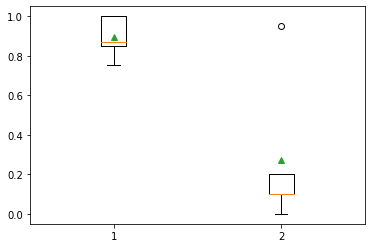

In [0]:
fig, ax = plt.subplots()
ax.boxplot([scores, score_average], showmeans=True)